In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

In [ ]:
# Step 1: Load sequences from file into a DataFrame
dna_seq = pd.read_csv("..\\data\\10_project_data_dna_sequences.txt", header=None)

In [ ]:
# Step 2: Concatenate all rows into a single string
all_sequences = ' '.join(dna_seq[0])

# Step 3: Split the string by spaces to separate each gene sequence
sequences = all_sequences.split()

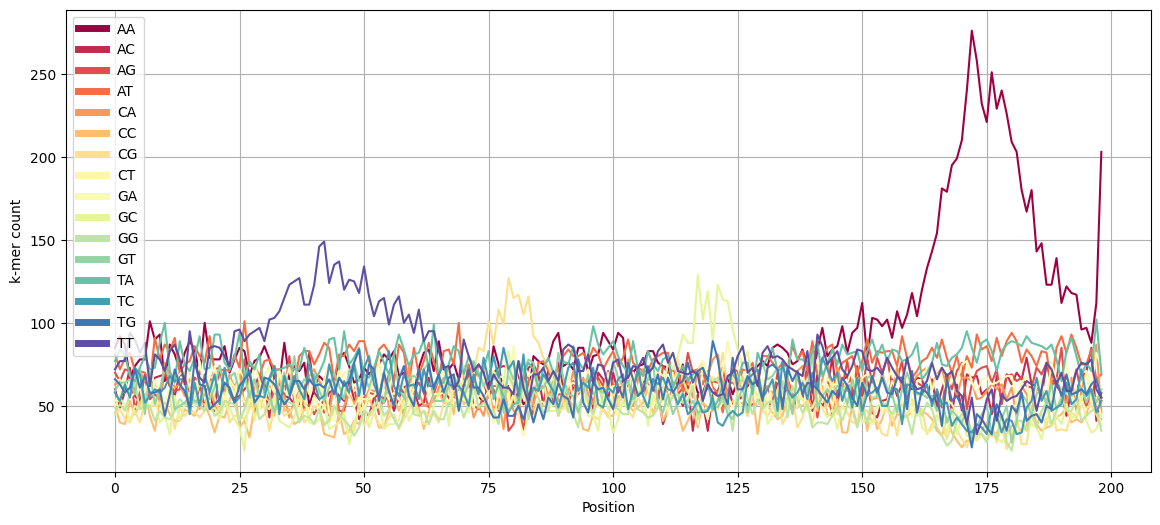

In [ ]:

# Step 4: Define kmers
kmers = ["AA", "AC", "AG", "AT",
         "CA", "CC", "CG", "CT",
         "GA", "GC", "GG", "GT",
         "TA", "TC", "TG", "TT"]

def count_kmer_occurrences(sequences, kmers):
    """
    Count occurrences of each k-mer in a list of DNA sequences.
    """
    # Find the maximum sequence length to avoid index errors
    max_length = max(len(seq) for seq in sequences)
    
    # Initialize empty lists to store counts for each kmer
    kmer_counts = {kmer: [0] * (max_length - len(kmer) + 1) for kmer in kmers}
    
    # Iterate over each sequence
    for seq in sequences:
        seq_length = len(seq)
        
        # Count occurrences of each kmer in the current sequence
        for kmer in kmers:
            kmer_length = len(kmer)
            
            # Slide through the sequence and count occurrences of the kmer
            for i in range(seq_length - kmer_length + 1):
                if seq[i:i+kmer_length] == kmer:
                    kmer_counts[kmer][i] += 1
    
    return kmer_counts

# Step 5: Get counts of occurrences for each kmer in the sequences
result = count_kmer_occurrences(sequences, kmers)

# Step 6: Visualize results
norm = Normalize(vmin=0, vmax=len(result)-1)
colormap = cm.Spectral

plt.figure(figsize=(14, 6))

# Plot each line with a gradient color
for i, (key, values) in enumerate(result.items()):
    color = colormap(norm(i))
    plt.plot(values, label=key, color=color)

# Set X-axis and Y-axis labels
plt.xlabel('Position')
plt.ylabel('k-mer count')

# Create a custom legend with gradient colors
legend_handles = [
    plt.Line2D([0], [0], color=colormap(norm(i)), lw=5, label=key) 
    for i, key in enumerate(result.keys())
]

plt.legend(handles=legend_handles)
plt.grid(True)
plt.show()